# Data Preprocessing and Feature Engineering Capstone Project

***Amen Habtamu Asfaw***

***21BTRCD058***

***May, 2023***

----

#### Assume you are a Chancellor Of Private University and you are having less results in Btech DataScience.You are hiring a DataAnalyst who can work on the raw data of students and give you useful insights.The DataAnalyst has now start the process with Data Collection, Data Cleaning, Data Encoding & Data Visualization Such that the insights given by him are useful for your university.

---

---

#### DATA COLLECTION

##### The dataset utilized in this analysis is a mock dataset specifically created for the purpose of illustrating the essential procedures involved in data analysis. It serves as a practical tool to showcase the various steps and methodologies that should be employed when working with an authentic dataset to extract the desired insights. While the data within this mock dataset is synthetic, the analysis techniques applied herein mirror those employed in real-world scenarios, enabling users to acquire a comprehensive understanding of the data analysis process. By utilizing this simulated dataset, users can familiarize themselves with the methodologies and gain the necessary proficiency to effectively tackle data analysis tasks using genuine datasets.

In [15]:
import pandas as pd

In [16]:
# Load the dataset
df = pd.read_excel('DPFE Capstone Project Dataset.xlsx')
df.head(10)

,Student ID,Name,Age,Gender,Attendance (%),Midterm Score,Project Score,Final Exam Score,Overall Score,Scholarship,Study Material,Programming Language
0,1,Rajesh,20.0,Male,95.0,85,90.0,88.0,89.50,Yes,Yes,Python
1,2,Priya,21.0,Female,92.0,78,85.0,90.0,84.75,No,Yes,R
2,3,Arjun,19.0,Male,88.0,80,82.0,85.0,83.75,Yes,No,Python
3,4,Aarav,20.0,Male,90.0,85,NaN,88.0,89.50,Yes,Yes,Python
4,5,Sameer,20.0,Male,94.0,75,80.0,82.0,80.25,No,No,R
5,6,Ishika,21.0,Female,92.0,80,85.0,NaN,84.75,No,Yes,R
6,7,Advait,19.0,Male,NaN,78,82.0,85.0,83.75,Yes,No,Python
7,8,Nivedita,20.0,Female,90.0,90,92.0,95.0,92.25,Yes,Yes,Python
8,9,Akash,22.0,Male,85.0,75,78.0,80.0,77.00,No,No,Python
9,10,Ishita,21.0,Female,92.0,88,85.0,88.0,87.25,No,Yes,R


In [14]:
df.describe()

,Student ID,Age,Attendance (%),Midterm Score,Project Score,Final Exam Score,Overall Score
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,31.500000,20.548387,90.241935,82.306452,85.377049,86.639344,85.262295
std,18.041619,1.002904,3.097781,5.361027,4.627657,4.211743,4.550587
min,1.000000,19.000000,85.000000,75.000000,78.000000,80.000000,77.000000
25%,16.250000,20.000000,88.000000,78.000000,82.000000,84.000000,81.812500
50%,31.500000,20.500000,91.000000,83.500000,85.000000,86.000000,85.750000
75%,46.750000,21.000000,92.000000,88.000000,90.000000,90.000000,87.500000
max,62.000000,22.000000,95.000000,90.000000,92.000000,95.000000,92.250000


---

#### DATA CLEANING

In [17]:
# Check for missing values
df.isnull().sum()

Student ID              0
Name                    0
Age                     2
Gender                  1
Attendance (%)          1
Midterm Score           0
Project Score           1
Final Exam Score        1
Overall Score           1
Scholarship             1
Study Material          1
Programming Language    1
dtype: int64

In [18]:
# Replace missing values with appropriate strategies

df['Project Score'].fillna(df['Project Score'].mean(), inplace=True)
df['Final Exam Score'].fillna(df['Final Exam Score'].mean(), inplace=True)
df['Attendance (%)'].fillna(df['Attendance (%)'].median(), inplace=True)
df['Overall Score'].fillna(df['Overall Score'].mean(), inplace=True)
df['Age'].fillna(df['Age'].mode()[0], inplace=True)
df['Study Material'].fillna(df['Study Material'].mode()[0], inplace=True)
df['Scholarship'].fillna(df['Scholarship'].mode()[0], inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Programming Language'].fillna(df['Programming Language'].mode()[0], inplace=True)

In [19]:
# Check for missing values
df.isnull().sum()

Student ID              0
Name                    0
Age                     0
Gender                  0
Attendance (%)          0
Midterm Score           0
Project Score           0
Final Exam Score        0
Overall Score           0
Scholarship             0
Study Material          0
Programming Language    0
dtype: int64

In [20]:
#Checking for duplicates
df.duplicated().sum()

0

In [21]:
import numpy as np

# Identify and handle outliers using z-score
z_scores = np.abs((df[['Midterm Score', 'Project Score', 'Final Exam Score', 'Overall Score']] - df[['Midterm Score', 'Project Score', 'Final Exam Score', 'Overall Score']].mean()) / df[['Midterm Score', 'Project Score', 'Final Exam Score', 'Overall Score']].std())


,Midterm Score,Project Score,Final Exam Score,Overall Score
0,0.502431,0.998983,0.323062,0.931244
1,0.803289,0.081477,0.797925,0.112578
2,0.430226,0.729754,0.389232,0.332330
3,0.502431,0.000000,0.323062,0.931244
4,1.362883,1.161938,1.101526,1.101461
...,...,...,...,...
57,1.435088,1.431167,1.985082,1.535561
58,1.362883,1.594122,1.576389,1.815655
59,1.062026,0.081477,0.323062,0.436802
60,0.502431,0.998983,0.323062,0.931244


In [15]:
# Removing values with more than 3 z-score 
df = df[(z_scores < 3).all(axis=1)]

In [16]:
# Saving the cleaned dataset
df.to_csv('cleaned_dataset.csv', index=False)

---

#### DATA ENCODING

In [13]:
# Importing the cleaned dataset
df = pd.read_csv('cleaned_dataset.csv')
df.head(10)

,Student ID,Name,Age,Gender,Attendance (%),Midterm Score,Project Score,Final Exam Score,Overall Score,Scholarship,Study Material,Programming Language
0,1,Rajesh,20.0,Male,95.0,85,90.000000,88.000000,89.50,Yes,Yes,Python
1,2,Priya,21.0,Female,92.0,78,85.000000,90.000000,84.75,No,Yes,R
2,3,Arjun,19.0,Male,88.0,80,82.000000,85.000000,83.75,Yes,No,Python
3,4,Aarav,20.0,Male,90.0,85,85.377049,88.000000,89.50,Yes,Yes,Python
4,5,Sameer,20.0,Male,94.0,75,80.000000,82.000000,80.25,No,No,R
5,6,Ishika,21.0,Female,92.0,80,85.000000,86.639344,84.75,No,Yes,R
6,7,Advait,19.0,Male,91.0,78,82.000000,85.000000,83.75,Yes,No,Python
7,8,Nivedita,20.0,Female,90.0,90,92.000000,95.000000,92.25,Yes,Yes,Python
8,9,Akash,22.0,Male,85.0,75,78.000000,80.000000,77.00,No,No,Python
9,10,Ishita,21.0,Female,92.0,88,85.000000,88.000000,87.25,No,Yes,R


In [70]:
# Mapping dictionary
mapping = { 'Python' : 0 , 'R' : 1, 'No': 0, 'Yes': 1}

# Encoding 'Scholarship' and 'Study Material'
df['Scholarship'] = df['Scholarship'].replace(mapping)
df['Programming Language'] = df['Programming Language'].replace(mapping)
df.head(3)

,Student ID,Name,Age,Gender,Attendance (%),Midterm Score,Project Score,Final Exam Score,Overall Score,Scholarship,Study Material,Programming Language
0,1,Rajesh,20.0,Male,95.0,85,90.0,88.0,89.50,1,Yes,0
1,2,Priya,21.0,Female,92.0,78,85.0,90.0,84.75,0,Yes,1
2,3,Arjun,19.0,Male,88.0,80,82.0,85.0,83.75,1,No,0


In [71]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Encode 'Gender'
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df.head()

,Student ID,Name,Age,Gender,Attendance (%),Midterm Score,Project Score,Final Exam Score,Overall Score,Scholarship,Study Material,Programming Language
0,1,Rajesh,20.0,1,95.0,85,90.000000,88.0,89.50,1,Yes,0
1,2,Priya,21.0,0,92.0,78,85.000000,90.0,84.75,0,Yes,1
2,3,Arjun,19.0,1,88.0,80,82.000000,85.0,83.75,1,No,0
3,4,Aarav,20.0,1,90.0,85,85.377049,88.0,89.50,1,Yes,0
4,5,Sameer,20.0,1,94.0,75,80.000000,82.0,80.25,0,No,1


In [72]:
# Encode 'Programming Language'

df = pd.get_dummies(df, columns=['Study Material'])
df.head()

,Student ID,Name,Age,Gender,Attendance (%),Midterm Score,Project Score,Final Exam Score,Overall Score,Scholarship,Programming Language,Study Material_No,Study Material_Yes
0,1,Rajesh,20.0,1,95.0,85,90.000000,88.0,89.50,1,0,0,1
1,2,Priya,21.0,0,92.0,78,85.000000,90.0,84.75,0,1,0,1
2,3,Arjun,19.0,1,88.0,80,82.000000,85.0,83.75,1,0,1,0
3,4,Aarav,20.0,1,90.0,85,85.377049,88.0,89.50,1,0,0,1
4,5,Sameer,20.0,1,94.0,75,80.000000,82.0,80.25,0,1,1,0


In [73]:
# Saving the encoded dataset
df.to_csv('encoded_dataset.csv',index=False)

---

#### DATA VISUALIZATION

In [11]:
import matplotlib.pyplot as plt

# Importing Cleaned and Encoded dataset
df = pd.read_csv('encoded_dataset.csv')
df.head()

,Student ID,Name,Age,Gender,Attendance (%),Midterm Score,Project Score,Final Exam Score,Overall Score,Scholarship,Programming Language,Study Material_No,Study Material_Yes
0,1,Rajesh,20.0,1,95.0,85,90.000000,88.0,89.50,1,0,0,1
1,2,Priya,21.0,0,92.0,78,85.000000,90.0,84.75,0,1,0,1
2,3,Arjun,19.0,1,88.0,80,82.000000,85.0,83.75,1,0,1,0
3,4,Aarav,20.0,1,90.0,85,85.377049,88.0,89.50,1,0,0,1
4,5,Sameer,20.0,1,94.0,75,80.000000,82.0,80.25,0,1,1,0


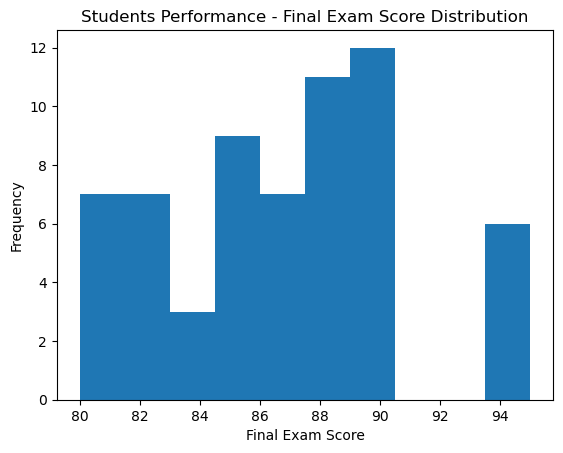

In [75]:
# Histogram of Final Exam Score
plt.hist(df['Final Exam Score'], bins=10)
plt.xlabel('Final Exam Score')
plt.ylabel('Frequency')
plt.title('Students Performance - Final Exam Score Distribution')
plt.show()

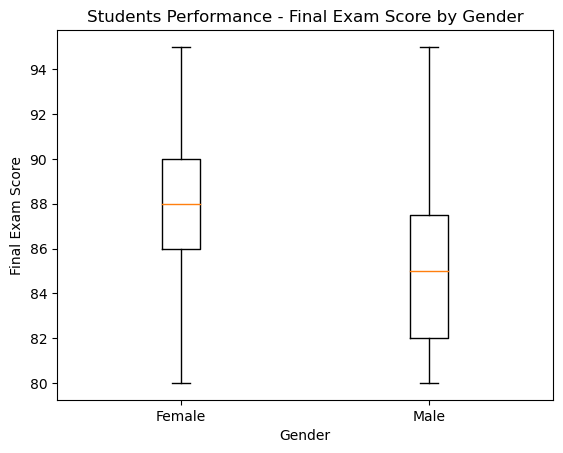

In [86]:
# Box plot of Final Exam Score by Gender
plt.boxplot([df[df['Gender'] == 0]['Final Exam Score'], df[df['Gender'] == 1]['Final Exam Score']])
plt.xticks([1, 2], ['Female', 'Male'])
plt.xlabel('Gender')
plt.ylabel('Final Exam Score')
plt.title('Students Performance - Final Exam Score by Gender')
plt.show()

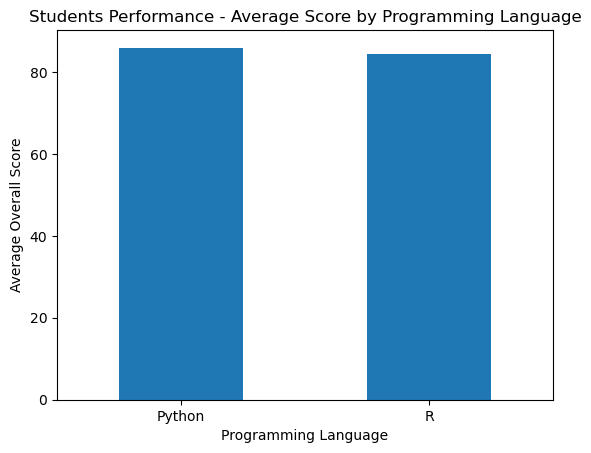

In [83]:
# Bar plot of Average Score by Programming Language
average_scores = df.groupby('Programming Language')['Overall Score'].mean()
average_scores.plot(kind='bar')
plt.xticks([0, 1], ['Python', 'R'], rotation=0)
plt.xlabel('Programming Language')
plt.ylabel('Average Overall Score')
plt.title('Students Performance - Average Score by Programming Language')
plt.show()

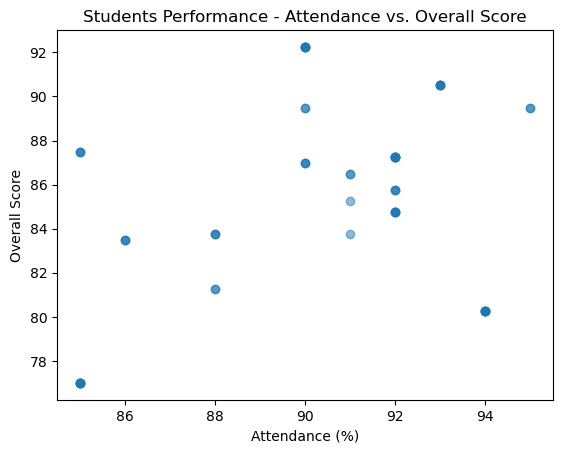

In [22]:
# Scatter plot of Overall Score vs. Attendance (%)
plt.scatter(df['Attendance (%)'], df['Overall Score'], alpha=0.5)
plt.xlabel('Attendance (%)')
plt.ylabel('Overall Score')
plt.title('Students Performance - Attendance vs. Overall Score')
plt.show()

---

### - INSIGHTS -

* The analysis of the final score distribution reveals that the majority of students' scores fall within the range of 80 to 90. However, to achieve a satisfactory level of performance, there is a need to push the scores towards the 90s. This indicates a potential area of improvement and suggests implementing strategies to enhance student performance and raise the overall score distribution to meet the desired satisfactory threshold.

* The analysis of the final exam scores by gender indicates that females tend to have higher performance compared to males. This insight suggests that more attention and support should be directed towards male students to bridge the performance gap and help them achieve comparable levels of success. Implementing targeted interventions and tailored support systems can potentially enhance the performance of male students and ensure equitable outcomes across genders.

* The analysis based on programming languages reveals that there is no significant difference in performance between R and Python users, although Python users have a slight edge. This insight suggests that both R and Python are equally effective languages for students in terms of achieving academic success. However, the slight advantage observed for Python may indicate its popularity and versatility in the field of data science, encouraging students to consider it as a preferred language for their studies.

* The analysis of attendance and final exam scores demonstrates a generally positive correlation, indicating that higher attendance is associated with better performance on the final exams. However, there are a few outliers where students with high attendance did not achieve expected scores. These outliers may be influenced by other factors, such as individual learning styles or external circumstances, highlighting the need for a holistic approach to student support and identifying potential areas for targeted interventions.

---

---